In [1]:
%load_ext autoreload
%autoreload 2
%aimport AD_predictor_tools

In [2]:
import pandas as pd
import protfasta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
fasta_dict = protfasta.read_fasta("../data/s_cer_proteome_UP000002311_559292.fasta")
df = pd.DataFrame.from_dict(fasta_dict, orient='index', columns=['seq'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'id'}, inplace=True)
df

,id,seq
0,sp|P04650|RL39_YEAST Large ribosomal subunit p...,MAAQKSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAKRRNWRR...
1,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,MGVHSFWDIAGPTARPVRLESLEDKRMAVDASIWIYQFLKAVRDQE...
2,sp|P08458|SPS1_YEAST Sporulation-specific prot...,MESKEISIRSRTPPSKLYSIQSCIGRGNFGDVYKAVDRVTQEIVAI...
3,sp|P08964|MYO1_YEAST Myosin-1 OS=Saccharomyces...,MTGGQSCSSNMIVWIPDEKEVFVKGELMSTDINKNKFTGQEEQIGI...
4,sp|P11938|RAP1_YEAST DNA-binding protein RAP1 ...,MSSPDDFETAPAEYVDALDPSMVVVDSGSAAVTAPSDSAAEVKANQ...
...,...,...
6060,sp|Q3E769|YO59A_YEAST Uncharacterized protein ...,MQYCELDLSGQWLDTVYCEENFSDFVFIKFLNPSQFEEKIYCYTLH...
6061,sp|Q3E842|YM122_YEAST Uncharacterized endoplas...,MASSTSTSASASSSIKTNSALVSNNVVAASSVSATSTASSSAAKNT...
6062,sp|Q8TGK0|YH1E_YEAST Putative uncharacterized ...,MYKITTIYLWLKSYLSFFIGLDNLDFLTLIRFFQCRLQNKLGLQDI...
6063,sp|Q8TGU6|YB182_YEAST Uncharacterized protein ...,MKIFTLYTMIQQYFFDNGGVYSIKNFYSAVPKEKMNIILVSLDCEL...


In [4]:
tiled_proteome_unprocessed = AD_predictor_tools.makeTilingDF("../data/s_cer_proteome_UP000002311_559292.fasta", window_size=40, window_spacing=40)
tiled_proteome_unprocessed

Using existing Tiling DF at ../data/TilingDFs/s_cer_proteome_UP000002311_559292_size_40_space_40_AAs_W,F,Y,M,L,Q.csv


,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge
0,MAAQKSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAK,sp|P04650|RL39_YEAST Large ribosomal subunit p...,0,40,1,1,1,2,2,4,7,5,0,0,12
1,RRNWRRTKMNI,sp|P04650|RL39_YEAST Large ribosomal subunit p...,40,51,1,0,0,1,0,0,1,4,0,0,5
2,MGVHSFWDIAGPTARPVRLESLEDKRMAVDASIWIYQFLK,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,0,40,2,2,1,2,3,1,2,3,3,2,0
3,AVRDQEGNAVKNSHITGFFRRICKLLYFGIRPVFVFDGGV,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,40,80,0,5,1,0,2,1,2,4,2,1,3
4,PVLKRETIRQRKERRQGKRESAKSTARKLLALQLQNGSND,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,80,120,0,0,0,0,5,4,5,7,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76317,NNDNKEDSEHICPDRTIANHEGPKDDFEAPVVMPSPNDIQ,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,80,120,0,1,0,1,0,1,2,1,6,4,-7
76318,FLLEVEYKGDLLVTIGADLVLNYPVEKFMTLPVKLSISDI,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,120,160,0,2,2,1,8,0,3,0,3,3,-3
76319,GLHSLCIVACLSKQLFLSFLCDVSDPALDDNQTVLDPKGP,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,160,200,0,2,0,0,8,2,2,0,5,0,-3
76320,ILAATKPLERISIVRSMKIETEIGEQYQGQGSVLRSVGEL,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,200,240,0,0,1,1,4,3,2,3,0,5,0


In [5]:
# tiled_proteome["window_len"] = tiled_proteome["ProteinWindowSeq"].str.len()
# tiled_proteome_too_short = tiled_proteome[tiled_proteome["window_len"] != 40]
# tiled_proteome_too_short

In [6]:
tiled_proteome_step_1 = AD_predictor_tools.makeTilingDF("../data/s_cer_proteome_UP000002311_559292.fasta", window_size=40, window_spacing=1)
tiled_proteome_step_1

Using existing Tiling DF at ../data/TilingDFs/s_cer_proteome_UP000002311_559292_size_40_space_1_AAs_W,F,Y,M,L,Q.csv


,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge
0,MAAQKSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAK,sp|P04650|RL39_YEAST Large ribosomal subunit p...,0,40,1,1,1,2,2,4,7,5,0,0,12
1,AAQKSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAKR,sp|P04650|RL39_YEAST Large ribosomal subunit p...,1,41,1,1,1,1,2,4,7,6,0,0,13
2,AQKSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAKRR,sp|P04650|RL39_YEAST Large ribosomal subunit p...,2,42,1,1,1,1,2,4,7,7,0,0,14
3,QKSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAKRRN,sp|P04650|RL39_YEAST Large ribosomal subunit p...,3,43,1,1,1,1,2,4,7,7,0,0,14
4,KSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAKRRNW,sp|P04650|RL39_YEAST Large ribosomal subunit p...,4,44,2,1,1,1,2,3,7,7,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701798,QGQGSVLRSVGELEQFLFTIFKDFLRKELAWPSWINLDFN,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,227,267,2,5,0,0,6,3,2,2,2,3,-1
2701799,GQGSVLRSVGELEQFLFTIFKDFLRKELAWPSWINLDFND,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,228,268,2,5,0,0,6,2,2,2,3,3,-2
2701800,QGSVLRSVGELEQFLFTIFKDFLRKELAWPSWINLDFNDG,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,229,269,2,5,0,0,6,2,2,2,3,3,-2
2701801,GSVLRSVGELEQFLFTIFKDFLRKELAWPSWINLDFNDGD,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,230,270,2,5,0,0,6,1,2,2,4,3,-3


In [7]:
tiled_proteome = pd.merge(tiled_proteome_unprocessed[["GeneName", "EndPosition"]], tiled_proteome_step_1, on = ["GeneName", "EndPosition"])
tiled_proteome

,GeneName,EndPosition,ProteinWindowSeq,StartPosition,W,F,Y,M,L,Q,K,R,D,E,Charge
0,sp|P04650|RL39_YEAST Large ribosomal subunit p...,40,MAAQKSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAK,0,1,1,1,2,2,4,7,5,0,0,12
1,sp|P04650|RL39_YEAST Large ribosomal subunit p...,51,KMAKAKKQNRPLPQWIRLRTNNTIRYNAKRRNWRRTKMNI,11,2,0,1,2,2,2,6,8,0,0,14
2,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,40,MGVHSFWDIAGPTARPVRLESLEDKRMAVDASIWIYQFLK,0,2,2,1,2,3,1,2,3,3,2,0
3,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,80,AVRDQEGNAVKNSHITGFFRRICKLLYFGIRPVFVFDGGV,40,0,5,1,0,2,1,2,4,2,1,3
4,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,120,PVLKRETIRQRKERRQGKRESAKSTARKLLALQLQNGSND,80,0,0,0,0,5,4,5,7,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76317,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,120,NNDNKEDSEHICPDRTIANHEGPKDDFEAPVVMPSPNDIQ,80,0,1,0,1,0,1,2,1,6,4,-7
76318,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,160,FLLEVEYKGDLLVTIGADLVLNYPVEKFMTLPVKLSISDI,120,0,2,2,1,8,0,3,0,3,3,-3
76319,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,200,GLHSLCIVACLSKQLFLSFLCDVSDPALDDNQTVLDPKGP,160,0,2,0,0,8,2,2,0,5,0,-3
76320,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,240,ILAATKPLERISIVRSMKIETEIGEQYQGQGSVLRSVGEL,200,0,0,1,1,4,3,2,3,0,5,0


In [8]:
tiled_proteome[tiled_proteome["ProteinWindowSeq"].str.len() != 40]

,GeneName,EndPosition,ProteinWindowSeq,StartPosition,W,F,Y,M,L,Q,K,R,D,E,Charge
1291,sp|Q3E7Z9|YO038_YEAST Uncharacterized protein ...,31,MKYMGSFLRKAATTNLFNSIKKRKVQNRAMS,0,0,2,1,3,2,1,5,3,0,0,8
2482,sp|P0C5N4|YH73B_YEAST Uncharacterized protein ...,26,MYFHSFLDTFSKYLGSTSCPLLRLSR,0,0,3,2,1,5,0,1,2,1,0,2
7542,sp|P0C5K9|YB39A_YEAST Uncharacterized protein ...,27,MWGLNRWLTFTMLILLITSHCCYWNKR,0,3,1,1,2,5,0,1,2,0,0,3
7548,sp|P0CX87|RS32B_YEAST Small ribosomal subunit ...,25,MRAKWRKKRTRRLKRKRRKVRARSK,0,1,0,0,1,1,0,7,10,0,0,17
8793,sp|P0C5P3|YK145_YEAST Uncharacterized protein ...,30,MGHLVLVRHYVLVLLLIELMQLLLGSLGLS,0,0,0,1,2,12,1,0,1,0,1,0
8794,sp|P0C5P6|YL163_YEAST Uncharacterized protein ...,37,MMTSLSLSIALLSKTDLVKISLRISTAFGISSCRDLA,0,0,1,0,2,7,0,2,2,2,0,2
13595,sp|P0C5P2|YK100_YEAST Uncharacterized protein ...,29,MIKVPLPDVIFVAHRNKHTRQGNITQTKY,0,0,1,1,1,1,2,3,2,1,0,4
15773,sp|Q3E775|YJ151_YEAST Uncharacterized protein ...,16,MLSLIFYLRFPSYIRG,0,0,2,2,1,3,0,0,2,0,0,2
16831,sp|P9WEJ1|YN040_YEAST Uncharacterized protein ...,26,MPEQKANCSPNGNITVDSMIMSLGSS,0,0,0,0,3,1,1,1,0,1,1,-1
18332,sp|Q8TGT7|YG204_YEAST Uncharacterized protein ...,37,MQWNAFSFVSYVYLRYFISFRPNIVLASVRLSWYSII,0,2,4,4,1,3,1,0,3,0,0,3


In [9]:
# Remove tiles where length < 40
tiled_proteome = tiled_proteome[tiled_proteome["ProteinWindowSeq"].str.len() == 40]
tiled_proteome

,GeneName,EndPosition,ProteinWindowSeq,StartPosition,W,F,Y,M,L,Q,K,R,D,E,Charge
0,sp|P04650|RL39_YEAST Large ribosomal subunit p...,40,MAAQKSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAK,0,1,1,1,2,2,4,7,5,0,0,12
1,sp|P04650|RL39_YEAST Large ribosomal subunit p...,51,KMAKAKKQNRPLPQWIRLRTNNTIRYNAKRRNWRRTKMNI,11,2,0,1,2,2,2,6,8,0,0,14
2,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,40,MGVHSFWDIAGPTARPVRLESLEDKRMAVDASIWIYQFLK,0,2,2,1,2,3,1,2,3,3,2,0
3,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,80,AVRDQEGNAVKNSHITGFFRRICKLLYFGIRPVFVFDGGV,40,0,5,1,0,2,1,2,4,2,1,3
4,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,120,PVLKRETIRQRKERRQGKRESAKSTARKLLALQLQNGSND,80,0,0,0,0,5,4,5,7,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76317,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,120,NNDNKEDSEHICPDRTIANHEGPKDDFEAPVVMPSPNDIQ,80,0,1,0,1,0,1,2,1,6,4,-7
76318,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,160,FLLEVEYKGDLLVTIGADLVLNYPVEKFMTLPVKLSISDI,120,0,2,2,1,8,0,3,0,3,3,-3
76319,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,200,GLHSLCIVACLSKQLFLSFLCDVSDPALDDNQTVLDPKGP,160,0,2,0,0,8,2,2,0,5,0,-3
76320,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,240,ILAATKPLERISIVRSMKIETEIGEQYQGQGSVLRSVGEL,200,0,0,1,1,4,3,2,3,0,5,0


In [10]:
tiled_proteome["WFYL"] = tiled_proteome["W"] + tiled_proteome["F"] + tiled_proteome["Y"] + tiled_proteome["L"]
tiled_proteome

,GeneName,EndPosition,ProteinWindowSeq,StartPosition,W,F,Y,M,L,Q,K,R,D,E,Charge,WFYL
0,sp|P04650|RL39_YEAST Large ribosomal subunit p...,40,MAAQKSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAK,0,1,1,1,2,2,4,7,5,0,0,12,5
1,sp|P04650|RL39_YEAST Large ribosomal subunit p...,51,KMAKAKKQNRPLPQWIRLRTNNTIRYNAKRRNWRRTKMNI,11,2,0,1,2,2,2,6,8,0,0,14,5
2,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,40,MGVHSFWDIAGPTARPVRLESLEDKRMAVDASIWIYQFLK,0,2,2,1,2,3,1,2,3,3,2,0,8
3,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,80,AVRDQEGNAVKNSHITGFFRRICKLLYFGIRPVFVFDGGV,40,0,5,1,0,2,1,2,4,2,1,3,8
4,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,120,PVLKRETIRQRKERRQGKRESAKSTARKLLALQLQNGSND,80,0,0,0,0,5,4,5,7,1,3,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76317,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,120,NNDNKEDSEHICPDRTIANHEGPKDDFEAPVVMPSPNDIQ,80,0,1,0,1,0,1,2,1,6,4,-7,1
76318,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,160,FLLEVEYKGDLLVTIGADLVLNYPVEKFMTLPVKLSISDI,120,0,2,2,1,8,0,3,0,3,3,-3,12
76319,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,200,GLHSLCIVACLSKQLFLSFLCDVSDPALDDNQTVLDPKGP,160,0,2,0,0,8,2,2,0,5,0,-3,10
76320,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,240,ILAATKPLERISIVRSMKIETEIGEQYQGQGSVLRSVGEL,200,0,0,1,1,4,3,2,3,0,5,0,5


In [11]:
synthetic_seqs = pd.read_csv("../data/SyntheticSeqs_AA.csv")

for AA in ["D", "E", "R", "K", "W", "F", "Y", "L"]:
    synthetic_seqs[AA] = synthetic_seqs["AAseq"].str.count(AA)
synthetic_seqs["Charge"] = synthetic_seqs["R"] + synthetic_seqs["K"] - synthetic_seqs["D"] - synthetic_seqs["E"] 
synthetic_seqs["WFYL"] = synthetic_seqs["W"] + synthetic_seqs["F"] + synthetic_seqs["Y"] + synthetic_seqs["L"]
synthetic_seqs

,AAseq,D,E,R,K,W,F,Y,L,Charge,WFYL
0,MLDEEGLLLDEDTEVFSTAEAVSDEEALEDLFNSQNLMSP,5,8,0,0,0,2,0,7,-13,9
1,CFALFSDEDELEDDSDIEEISESFWAMELRMNLESLDTIL,6,8,1,0,1,3,0,6,-13,10
2,RTDLHFDLQEEVDIGLDSFEADILDFAKTDKEFQSLLVKG,7,4,1,3,0,4,0,6,-7,10
3,LDRLKELDDFDDHLLSSDVDEDSACYDFTFGLCFSKLFDG,10,2,1,2,0,5,1,7,-9,13
4,SDEQLELSEKQSYSDLDYKAEGLDSFPDAVQLWFPFLLDI,6,4,0,2,1,3,2,7,-8,13
...,...,...,...,...,...,...,...,...,...,...,...
18745,IDHPSSSSMLSGELLFDGCWLETTDGSEFLSTNSDYDIGI,5,3,0,0,1,2,1,5,-8,9
18746,WSSVTSFVSPDESFFNVSAFSEDEWIEVDSDEDKMLVGDV,6,5,0,1,2,4,0,1,-10,7
18747,VKLFLCSDDDLFSAYMNLDNIDHLLDFSSLDPSNYNNMWN,7,0,0,1,1,3,2,7,-6,13
18748,NQEYKKGLWTVEEDLEWLSNFVEDSFSDDTDEDLYKYDPW,7,6,0,3,3,2,3,4,-10,12


In [14]:
## GCN4
gcn4 = pd.read_csv("../data/Table_S5_Tile_Activities_Properties_Dataframe.csv")
gcn4 = gcn4[["ADseq", "Activity_SCglucose"]]
gcn4 = gcn4.rename(columns = {"ADseq" : "seq", "Activity_SCglucose": "score"})
gcn4["seq"] = gcn4["seq"].str.strip().str.upper()
gcn4["screen"] = "gcn4"
gcn4 = gcn4.drop_duplicates(subset = "seq").dropna()

for AA in ["D", "E", "R", "K", "W", "F", "Y", "L"]:
    gcn4[AA] = gcn4["seq"].str.count(AA)
gcn4["Charge"] = gcn4["R"] + gcn4["K"] - gcn4["D"] - gcn4["E"] 
gcn4["WFYL"] = gcn4["W"] + gcn4["F"] + gcn4["Y"] + gcn4["L"]
gcn4

,seq,score,screen,D,E,R,K,W,F,Y,L,Charge,WFYL
0,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA,50849.75654,gcn4,1,2,6,0,0,1,2,3,3,6
1,EVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQ,22153.46439,gcn4,1,2,5,0,0,1,3,2,2,6
2,IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG,25911.89042,gcn4,1,1,4,0,0,2,2,2,2,6
3,ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG,22446.77365,gcn4,1,0,4,0,0,2,2,3,3,7
4,QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA,51501.39821,gcn4,1,0,4,0,0,2,2,3,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20726,AKVDTEEEDKTMVDSTSLSWEDLFDFESYSTDLIASINPD,261829.75160,gcn4,7,5,0,2,1,2,1,3,-10,7
20727,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,261410.70530,gcn4,7,4,1,1,1,3,3,2,-9,9
20728,MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK,152798.87030,gcn4,6,5,0,2,1,2,1,3,-9,7
20729,STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK,113197.55830,gcn4,5,3,0,2,1,2,1,3,-6,7


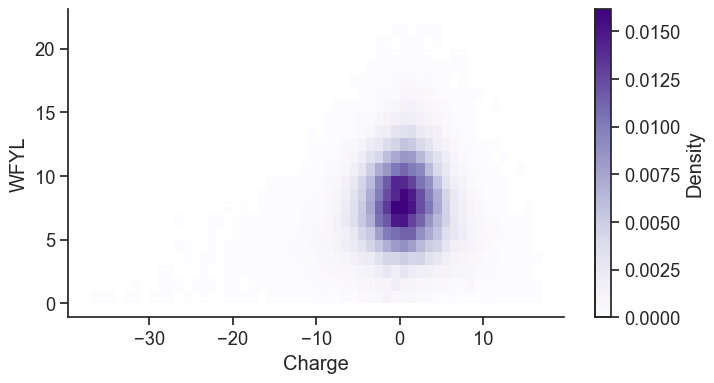

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))

hist = sns.histplot(data = tiled_proteome[["Charge", "WFYL"]], x= "Charge", y = "WFYL", binwidth = 1, stat = 'density', cmap = "Purples", ax = ax)

# Add colorbar
# The quadmesh object is in the collections[0] of the axes
cbar = plt.colorbar(hist.collections[0], ax=ax)
cbar.set_label('Density')  # Optional label

sns.despine()

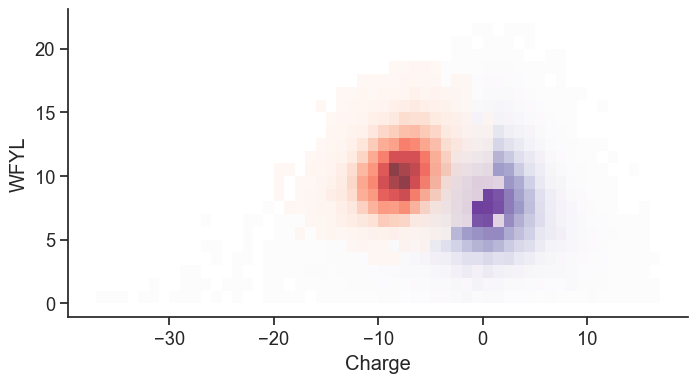

In [89]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(data = tiled_proteome[["Charge", "WFYL"]], x= "Charge", y = "WFYL", binwidth = 1, stat = 'density', cmap = "Purples", ax = ax, alpha = 0.75)
sns.histplot(data = synthetic_seqs[["Charge", "WFYL"]], x= "Charge", y = "WFYL", binwidth = 1, stat = 'density', cmap = "Reds", ax = ax, alpha = 0.75)


sns.despine()

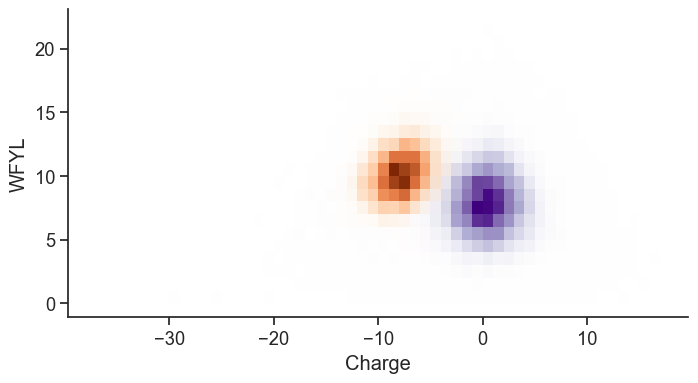

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap, to_rgba

# Create a transparent version of a seaborn/matplotlib colormap
def fade_cmap(base_cmap_name, n_colors=10000):
    base = plt.cm.get_cmap(base_cmap_name, n_colors)
    colors = base(np.linspace(0, 1, n_colors))
    # Add alpha gradient: 0 (transparent) → 1 (opaque)
    colors[:, -1] = np.linspace(0, 1, n_colors)
    return ListedColormap(colors)

# Custom faded colormaps
faded_purples = fade_cmap("Purples")
faded_Oranges = fade_cmap("Oranges")

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(
    data=tiled_proteome[["Charge", "WFYL"]],
    x="Charge", y="WFYL",
    binwidth=1, stat='density',
    cmap=faded_purples, ax=ax
)
# sns.kdeplot(data=tiled_proteome[["Charge", "WFYL"]], 
#             x="Charge", y="WFYL", 
#             label='Tiled Proteome',
#             color='Purple')

sns.histplot(
    data=synthetic_seqs[["Charge", "WFYL"]],
    x="Charge", y="WFYL",
    binwidth=1, stat='density',
    cmap=faded_Oranges, ax=ax
)
# sns.kdeplot(data=synthetic_seqs[["Charge", "WFYL"]], 
#             x="Charge", y="WFYL", 
#             label='Tiled Proteome',
#             color='orange')
    
sns.despine()


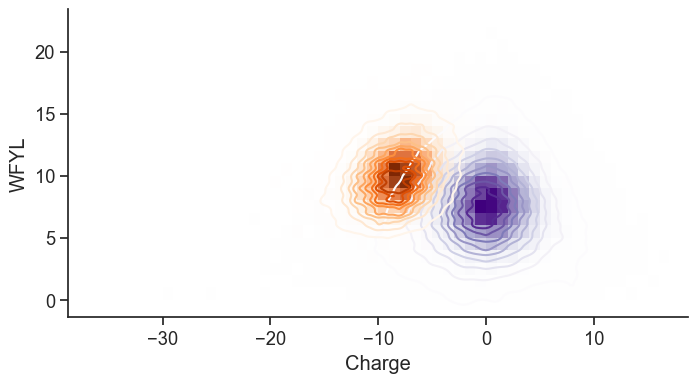

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap, to_rgba

# Create a transparent version of a seaborn/matplotlib colormap
def fade_cmap(base_cmap_name, n_colors=10000):
    base = plt.cm.get_cmap(base_cmap_name, n_colors)
    colors = base(np.linspace(0, 1, n_colors))
    # Add alpha gradient: 0 (transparent) → 1 (opaque)
    colors[:, -1] = np.linspace(0, 1, n_colors)
    return ListedColormap(colors)

# Custom faded colormaps
faded_purples = fade_cmap("Purples")
faded_Oranges = fade_cmap("Oranges")

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(
    data=tiled_proteome[["Charge", "WFYL"]],
    x="Charge", y="WFYL",
    binwidth=1, stat='density',
    cmap=faded_purples, ax=ax
)
sns.kdeplot(data = tiled_proteome[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Tiled Proteome', cmap='Purples')

sns.histplot(
    data=synthetic_seqs[["Charge", "WFYL"]],
    x="Charge", y="WFYL",
    binwidth=1, stat='density',
    cmap=faded_Oranges, ax=ax
)
sns.kdeplot(data = synthetic_seqs[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Synthetic Sequences', cmap='Oranges')

    
sns.despine()

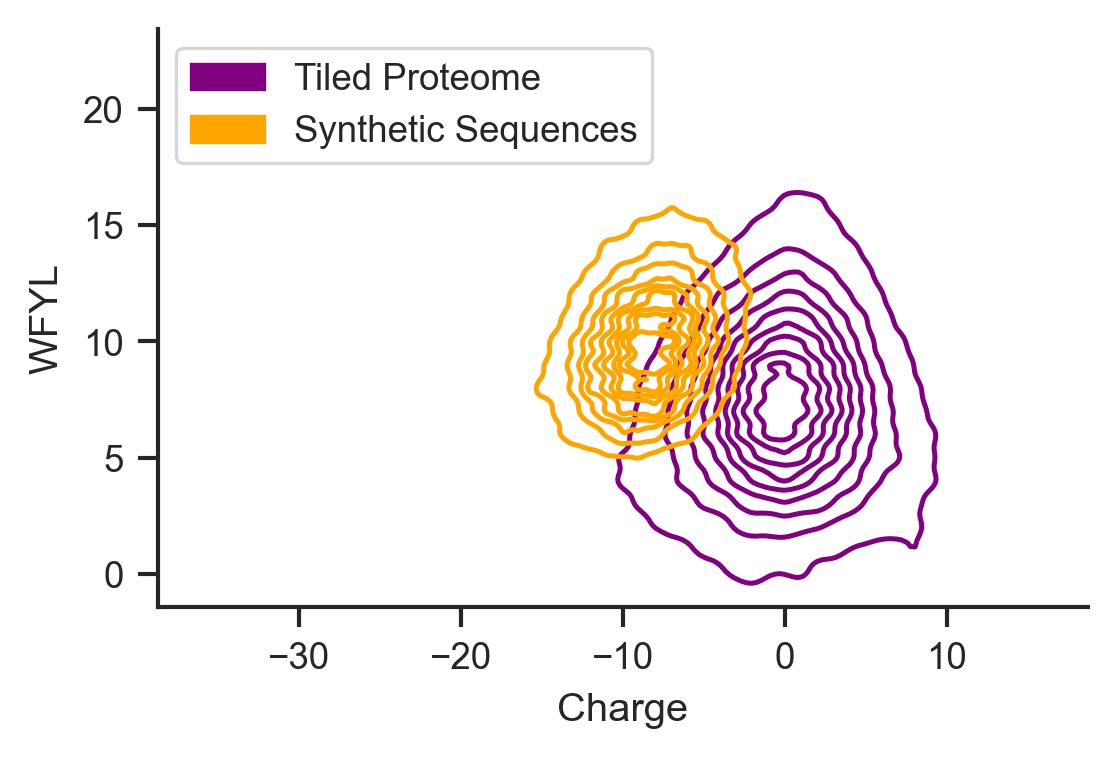

In [114]:
import matplotlib.patches as mpatches

sns.set_context('paper')
plt.figure(dpi = 300, figsize = (4, 2.5))

sns.kdeplot(data = tiled_proteome[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Tiled Proteome', color='Purple')
sns.kdeplot(data = synthetic_seqs[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Synthetic Sequences', color='orange')

# Manually define legend handles
legend_patches = [
    mpatches.Patch(color='purple', label='Tiled Proteome'),
    mpatches.Patch(color='orange', label='Synthetic Sequences')
]

sns.despine()
plt.legend(handles=legend_patches, loc = 'upper left')
plt.show()

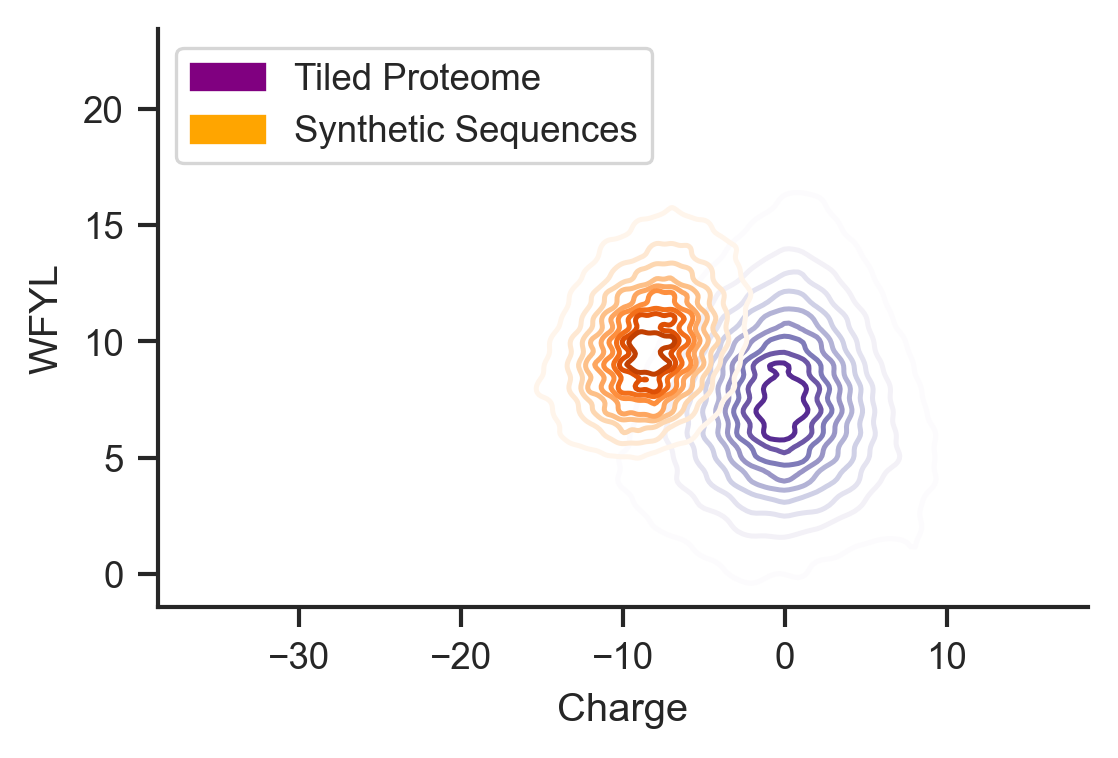

In [16]:
import matplotlib.patches as mpatches

sns.set_context('paper')
plt.figure(dpi = 300, figsize = (4, 2.5))

sns.kdeplot(data = tiled_proteome[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Tiled Proteome', cmap='Purples')
sns.kdeplot(data = synthetic_seqs[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Synthetic Sequences', cmap='Oranges')

# Manually define legend handles
legend_patches = [
    mpatches.Patch(color='purple', label='Tiled Proteome'),
    mpatches.Patch(color='orange', label='Synthetic Sequences'),
]

sns.despine()
plt.legend(handles=legend_patches, loc='upper left')
plt.savefig("../output/proteome_heatmap.png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()

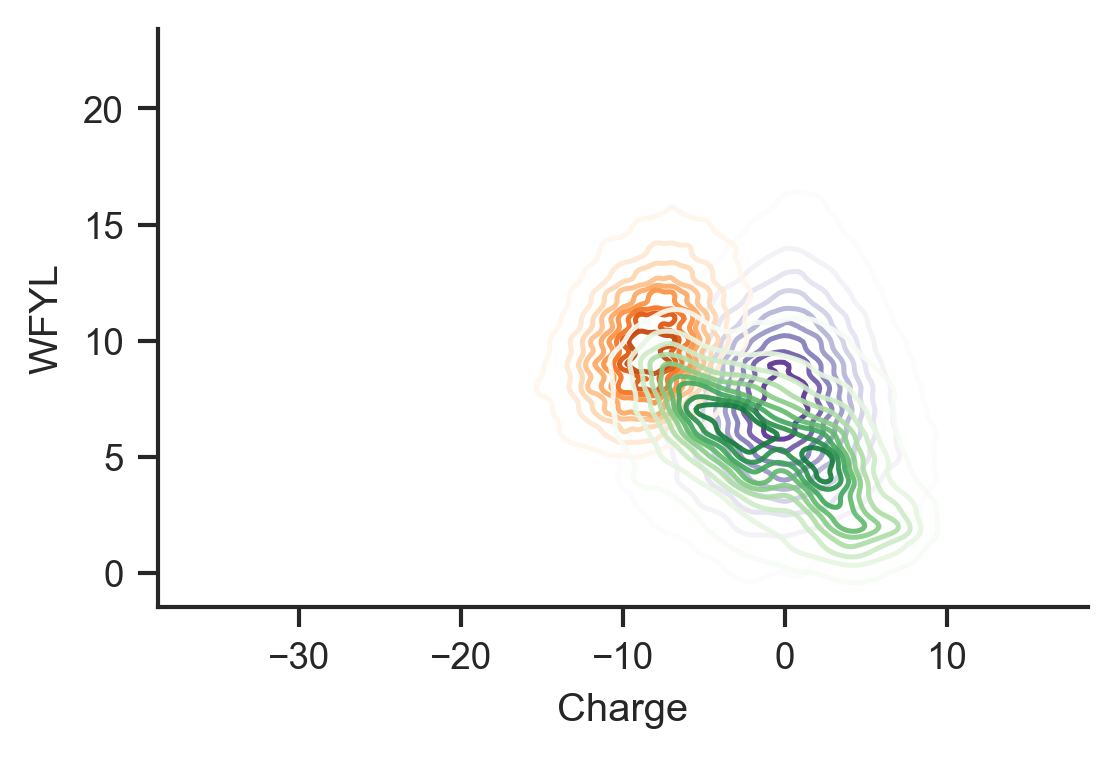

In [17]:
import matplotlib.patches as mpatches

sns.set_context('paper')
plt.figure(dpi = 300, figsize = (4, 2.5))

sns.kdeplot(data = tiled_proteome[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Tiled Proteome', cmap='Purples', alpha = 0.9)
sns.kdeplot(data = synthetic_seqs[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Synthetic Sequences', cmap='Oranges', alpha = 0.9)
sns.kdeplot(data = gcn4[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='GCN4', cmap='Greens', alpha = 0.9)

# Manually define legend handles
legend_patches = [
    mpatches.Patch(color='purple', label='Tiled Proteome'),
    mpatches.Patch(color='orange', label='Synthetic Sequences'),
    mpatches.Patch(color='green', label='GCN4')
]

sns.despine()
# plt.legend(handles=legend_patches, loc='upper left')
# plt.savefig("../output/proteome_heatmap.png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [121]:
tiled_proteome

,GeneName,EndPosition,ProteinWindowSeq,StartPosition,W,F,Y,M,L,Q,K,R,D,E,Charge,WFYL
0,sp|P04650|RL39_YEAST Large ribosomal subunit p...,40,MAAQKSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAK,0,1,1,1,2,2,4,7,5,0,0,12,5
1,sp|P04650|RL39_YEAST Large ribosomal subunit p...,51,KMAKAKKQNRPLPQWIRLRTNNTIRYNAKRRNWRRTKMNI,11,2,0,1,2,2,2,6,8,0,0,14,5
2,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,40,MGVHSFWDIAGPTARPVRLESLEDKRMAVDASIWIYQFLK,0,2,2,1,2,3,1,2,3,3,2,0,8
3,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,80,AVRDQEGNAVKNSHITGFFRRICKLLYFGIRPVFVFDGGV,40,0,5,1,0,2,1,2,4,2,1,3,8
4,sp|P07276|RAD2_YEAST DNA repair protein RAD2 O...,120,PVLKRETIRQRKERRQGKRESAKSTARKLLALQLQNGSND,80,0,0,0,0,5,4,5,7,1,3,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76317,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,120,NNDNKEDSEHICPDRTIANHEGPKDDFEAPVVMPSPNDIQ,80,0,1,0,1,0,1,2,1,6,4,-7,1
76318,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,160,FLLEVEYKGDLLVTIGADLVLNYPVEKFMTLPVKLSISDI,120,0,2,2,1,8,0,3,0,3,3,-3,12
76319,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,200,GLHSLCIVACLSKQLFLSFLCDVSDPALDDNQTVLDPKGP,160,0,2,0,0,8,2,2,0,5,0,-3,10
76320,sp|Q92328|MDM12_YEAST Mitochondrial distributi...,240,ILAATKPLERISIVRSMKIETEIGEQYQGQGSVLRSVGEL,200,0,0,1,1,4,3,2,3,0,5,0,5


In [122]:
synthetic_seqs

,AAseq,D,E,R,K,W,F,Y,L,Charge,WFYL
0,MLDEEGLLLDEDTEVFSTAEAVSDEEALEDLFNSQNLMSP,5,8,0,0,0,2,0,7,-13,9
1,CFALFSDEDELEDDSDIEEISESFWAMELRMNLESLDTIL,6,8,1,0,1,3,0,6,-13,10
2,RTDLHFDLQEEVDIGLDSFEADILDFAKTDKEFQSLLVKG,7,4,1,3,0,4,0,6,-7,10
3,LDRLKELDDFDDHLLSSDVDEDSACYDFTFGLCFSKLFDG,10,2,1,2,0,5,1,7,-9,13
4,SDEQLELSEKQSYSDLDYKAEGLDSFPDAVQLWFPFLLDI,6,4,0,2,1,3,2,7,-8,13
...,...,...,...,...,...,...,...,...,...,...,...
18745,IDHPSSSSMLSGELLFDGCWLETTDGSEFLSTNSDYDIGI,5,3,0,0,1,2,1,5,-8,9
18746,WSSVTSFVSPDESFFNVSAFSEDEWIEVDSDEDKMLVGDV,6,5,0,1,2,4,0,1,-10,7
18747,VKLFLCSDDDLFSAYMNLDNIDHLLDFSSLDPSNYNNMWN,7,0,0,1,1,3,2,7,-6,13
18748,NQEYKKGLWTVEEDLEWLSNFVEDSFSDDTDEDLYKYDPW,7,6,0,3,3,2,3,4,-10,12


In [148]:
tiled_proteome["Group"]  = "Proteome"
synthetic_seqs["Group"] = "Synthetics"
all_tiles = pd.concat([tiled_proteome[["Charge", "WFYL", "Group"]], synthetic_seqs[["Charge", "WFYL", "Group"]]])
all_tiles

,Charge,WFYL,Group
0,12,5,Proteome
1,14,5,Proteome
2,0,8,Proteome
3,3,8,Proteome
4,8,5,Proteome
...,...,...,...
18745,-8,9,Synthetics
18746,-10,7,Synthetics
18747,-6,13,Synthetics
18748,-10,12,Synthetics


<Axes: xlabel='Charge', ylabel='Count'>

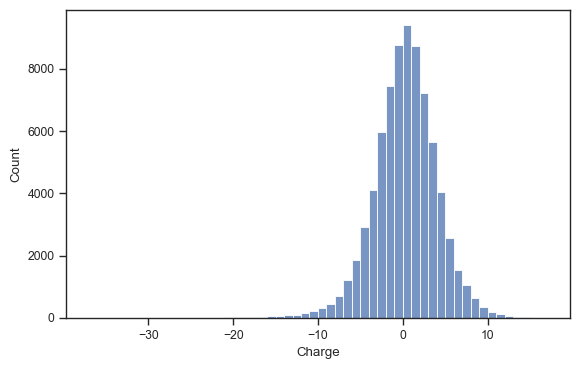

In [149]:
sns.histplot(tiled_proteome["Charge"], binwidth = 1)

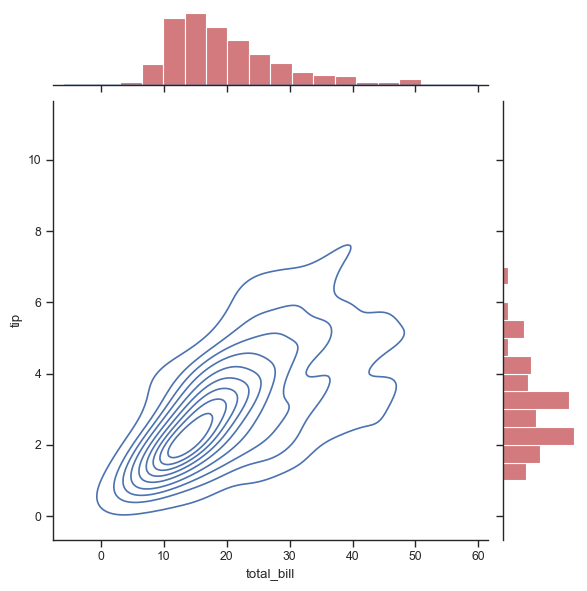

In [150]:
# Sample data
tips = sns.load_dataset("tips")

# KDE in center, histograms on margins (default)
g = sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="kde"
)
g.plot_marginals(sns.histplot, color="r")
plt.show()

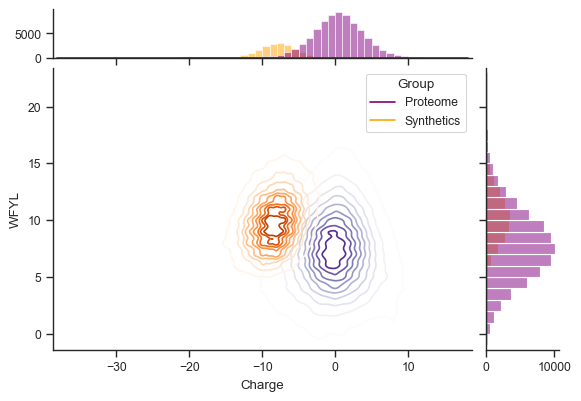

In [156]:
sns.set_context('paper')

# Create a joint plot with marginal histograms
joint_plot = sns.jointplot(
    data=all_tiles,
    x="Charge",
    y="WFYL",
    kind="kde",
    hue = 'Group',
    marginal_ticks=True,
    palette = {"Proteome" : "Purple", "Synthetics" : "Orange"}, height = 5)

for artist in joint_plot.ax_joint.collections:
    artist.remove()
joint_plot.plot_marginals(sns.histplot, binwidth = 1)

sns.kdeplot(data = tiled_proteome[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Tiled Proteome', cmap='Purples', ax = joint_plot.ax_joint)
sns.kdeplot(data = synthetic_seqs[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Synthetic Sequences', cmap='Oranges', ax = joint_plot.ax_joint)



# Add legend
#joint_plot.ax_joint.legend(loc="upper left")
joint_plot.fig.set_figwidth(6)
joint_plot.fig.set_figheight(4)
joint_plot.savefig("../output/proteome_heatmap_with_marginals.png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [18]:
tiled_proteome["Group"]  = "Proteome"
synthetic_seqs["Group"] = "Synthetics"
gcn4["Group"] = "GCN4"
three_screen_tiles = pd.concat([tiled_proteome[["Charge", "WFYL", "Group"]], synthetic_seqs[["Charge", "WFYL", "Group"]], gcn4[["Charge", "WFYL", "Group"]]])
three_screen_tiles

,Charge,WFYL,Group
0,12,5,Proteome
1,14,5,Proteome
2,0,8,Proteome
3,3,8,Proteome
4,8,5,Proteome
...,...,...,...
20726,-10,7,GCN4
20727,-9,9,GCN4
20728,-9,7,GCN4
20729,-6,7,GCN4


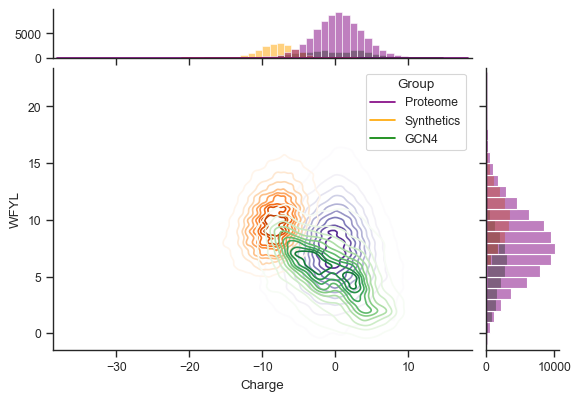

In [23]:
sns.set_context('paper')

# Create a joint plot with marginal histograms
joint_plot = sns.jointplot(
    data=three_screen_tiles,
    x="Charge",
    y="WFYL",
    kind="kde",
    hue = 'Group',
    marginal_ticks=True,
    palette = {"Proteome" : "Purple", "Synthetics" : "Orange", "GCN4" : "Green"}, height = 5)

for artist in joint_plot.ax_joint.collections:
    artist.remove()
joint_plot.plot_marginals(sns.histplot, binwidth = 1)

sns.kdeplot(data = tiled_proteome[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Tiled Proteome', cmap='Purples', ax = joint_plot.ax_joint)
sns.kdeplot(data = synthetic_seqs[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Synthetic Sequences', cmap='Oranges', ax = joint_plot.ax_joint)
sns.kdeplot(data = gcn4[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='GCN4', cmap='Greens', ax = joint_plot.ax_joint)


# Add legend
#joint_plot.ax_joint.legend(loc="upper left")
joint_plot.fig.set_figwidth(6)
joint_plot.fig.set_figheight(4)
joint_plot.savefig("../output/proteome_heatmap_with_marginals_gcn4.png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()

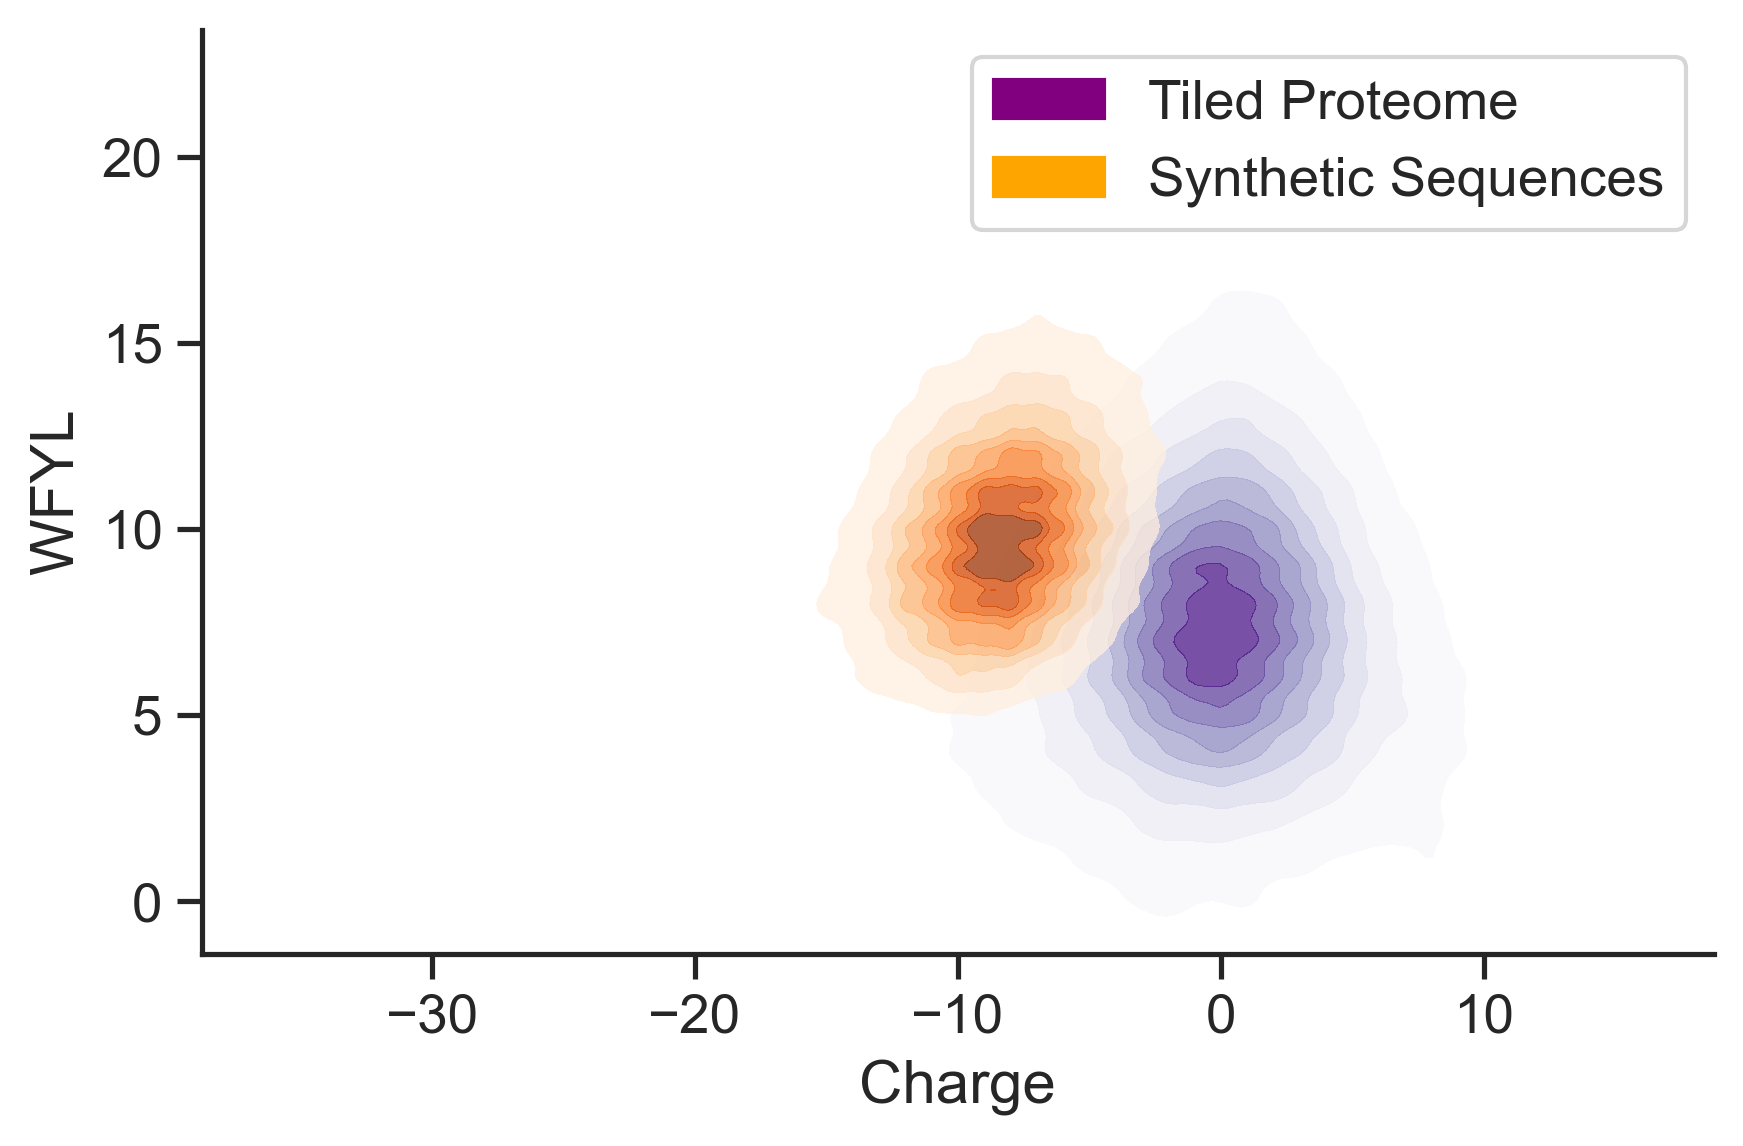

In [102]:
import matplotlib.patches as mpatches

plt.figure(dpi = 300)

sns.kdeplot(data = tiled_proteome[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Tiled Proteome', cmap='Purples', fill = True, alpha = 0.75)
sns.kdeplot(data = synthetic_seqs[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Synthetic Sequences', cmap='Oranges', fill = True, alpha = 0.75)

# Manually define legend handles
legend_patches = [
    mpatches.Patch(color='purple', label='Tiled Proteome'),
    mpatches.Patch(color='orange', label='Synthetic Sequences')
]

sns.despine()
plt.legend(handles=legend_patches)
plt.show()

In [ ]:


plt.figure(figsize=(10, 6))
sns.kdeplot(data=tiled_proteome, x="Charge", y="WFYL", cmap="Blues", fill=True)
plt.title("KDE Plot of Charge vs WFYL")
plt.xlabel("Charge")
plt.ylabel("WFYL")
plt.show()

# Heatmap by state size

In [27]:
synthetics_ss = pd.read_csv("../data/All_SynethicADs_Info.csv")
synthetics_ss["state_size"] = synthetics_ss["PADDLE_Origin"].str.split("_").str[1].str[-1].astype(int)
synthetics_ss

,Seq,PADDLE_Origin,PADDLE_Score,PADDLE_Predicted,TADA_Origin,TADA_Score,TADA_Predicted,ADHunter_Origin,ADHunter_Score,ADHunter_Predicted,Kotha_Origin,Kotha_Predicted,state_size
0,PPDEAVINYGTAQGLDKWEEEMMKDEAEPCGEKYTSIGTD,PADDLE_SS1_10,0.980197,0,TADA_SS1_10,0.280859,0,ADHUNTER_SS1_10,45250.594,0,KOTHA_SS1_10,0,1
1,SVQEEMDDGVPGGFASPYLALDQPVQSFEEKTRSFMPSDS,PADDLE_SS1_10,2.557771,0,TADA_SS1_10,0.335393,0,ADHUNTER_SS1_10,63078.312,0,KOTHA_SS1_10,0,1
2,LEFYYWFPMEGPTHFQKDTTFSFMDEVNNGDELSDIGNST,PADDLE_SS1_10,4.773660,0,TADA_SS1_10,0.465010,0,ADHUNTER_SS1_10,145611.100,0,KOTHA_SS1_10,0,1
3,RLVGDIFLLQNPTEGEILKLDNQAMDEDRFTSVQVEEWLD,PADDLE_SS1_10,4.580650,0,TADA_SS1_10,0.559662,0,ADHUNTER_SS1_10,46756.566,0,KOTHA_SS1_10,1,1
4,TLGCLAEDGHHALPSAPILEQPAATCSLLGYYLAKASPSN,PADDLE_SS1_10,0.208879,0,TADA_SS1_10,0.209514,0,ADHUNTER_SS1_10,42965.188,0,KOTHA_SS1_10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,TVGDFSDDLLDFSSLDDKTLMMMPPSTFSGGSTAATSSSM,PADDLE_SS5_20,7.571014,1,TADA_SS5_20,0.493165,0,ADHUNTER_SS5_20,133506.810,0,KOTHA_SS5_20,0,5
499996,QTLSTTNSSSSTSPQQHKRQTINCYSGCPSSSELAAIATE,PADDLE_SS5_20,-0.035098,0,TADA_SS5_20,0.160295,0,ADHUNTER_SS5_20,33107.516,0,KOTHA_SS5_20,0,5
499997,QRKVLQPKYEFPSSELAAISKGLPSVLQLQAEIENLLHQK,PADDLE_SS5_20,0.025929,0,TADA_SS5_20,0.220115,0,ADHUNTER_SS5_20,32751.959,0,KOTHA_SS5_20,0,5
499998,TPKLMEESYEDEDDMMMVGDIPWDMFSSSSSQRKEDEQER,PADDLE_SS5_20,5.373287,0,TADA_SS5_20,0.540743,0,ADHUNTER_SS5_20,55326.297,0,KOTHA_SS5_20,0,5


In [29]:
synthetics_ss["state_size"].value_counts()

state_size
1    100000
2    100000
3    100000
4    100000
5    100000
Name: count, dtype: int64

In [31]:
for AA in ["D", "E", "R", "K", "W", "F", "Y", "L"]:
    synthetics_ss[AA] = synthetics_ss["Seq"].str.count(AA)
synthetics_ss["Charge"] = synthetics_ss["R"] + synthetics_ss["K"] - synthetics_ss["D"] - synthetics_ss["E"] 
synthetics_ss["WFYL"] = synthetics_ss["W"] + synthetics_ss["F"] + synthetics_ss["Y"] + synthetics_ss["L"]
synthetics_ss

,Seq,PADDLE_Origin,PADDLE_Score,PADDLE_Predicted,TADA_Origin,TADA_Score,TADA_Predicted,ADHunter_Origin,ADHunter_Score,ADHunter_Predicted,...,D,E,R,K,W,F,Y,L,Charge,WFYL
0,PPDEAVINYGTAQGLDKWEEEMMKDEAEPCGEKYTSIGTD,PADDLE_SS1_10,0.980197,0,TADA_SS1_10,0.280859,0,ADHUNTER_SS1_10,45250.594,0,...,4,7,0,3,1,0,2,1,-8,4
1,SVQEEMDDGVPGGFASPYLALDQPVQSFEEKTRSFMPSDS,PADDLE_SS1_10,2.557771,0,TADA_SS1_10,0.335393,0,ADHUNTER_SS1_10,63078.312,0,...,4,4,1,1,0,3,1,2,-6,6
2,LEFYYWFPMEGPTHFQKDTTFSFMDEVNNGDELSDIGNST,PADDLE_SS1_10,4.773660,0,TADA_SS1_10,0.465010,0,ADHUNTER_SS1_10,145611.100,0,...,4,4,0,1,1,5,2,2,-7,10
3,RLVGDIFLLQNPTEGEILKLDNQAMDEDRFTSVQVEEWLD,PADDLE_SS1_10,4.580650,0,TADA_SS1_10,0.559662,0,ADHUNTER_SS1_10,46756.566,0,...,5,5,2,1,1,2,0,6,-7,9
4,TLGCLAEDGHHALPSAPILEQPAATCSLLGYYLAKASPSN,PADDLE_SS1_10,0.208879,0,TADA_SS1_10,0.209514,0,ADHUNTER_SS1_10,42965.188,0,...,1,2,0,1,0,0,2,7,-2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,TVGDFSDDLLDFSSLDDKTLMMMPPSTFSGGSTAATSSSM,PADDLE_SS5_20,7.571014,1,TADA_SS5_20,0.493165,0,ADHUNTER_SS5_20,133506.810,0,...,6,0,0,1,0,3,0,4,-5,7
499996,QTLSTTNSSSSTSPQQHKRQTINCYSGCPSSSELAAIATE,PADDLE_SS5_20,-0.035098,0,TADA_SS5_20,0.160295,0,ADHUNTER_SS5_20,33107.516,0,...,0,2,1,1,0,0,1,2,0,3
499997,QRKVLQPKYEFPSSELAAISKGLPSVLQLQAEIENLLHQK,PADDLE_SS5_20,0.025929,0,TADA_SS5_20,0.220115,0,ADHUNTER_SS5_20,32751.959,0,...,0,4,1,4,0,1,1,7,1,9
499998,TPKLMEESYEDEDDMMMVGDIPWDMFSSSSSQRKEDEQER,PADDLE_SS5_20,5.373287,0,TADA_SS5_20,0.540743,0,ADHUNTER_SS5_20,55326.297,0,...,6,7,2,2,1,1,1,1,-9,4


<Axes: xlabel='Charge', ylabel='Count'>

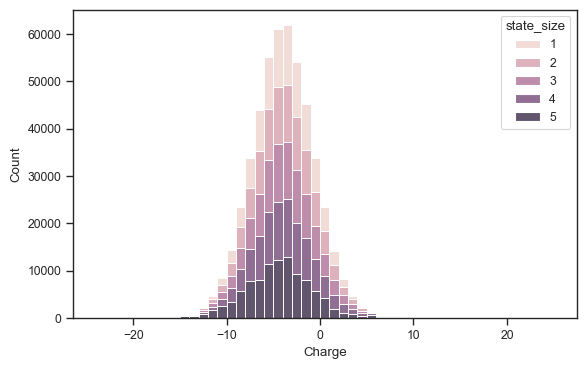

In [34]:
sns.histplot(data = synthetics_ss, x= "Charge", hue = "state_size", multiple="stack", binwidth=1)

<Axes: xlabel='WFYL', ylabel='Count'>

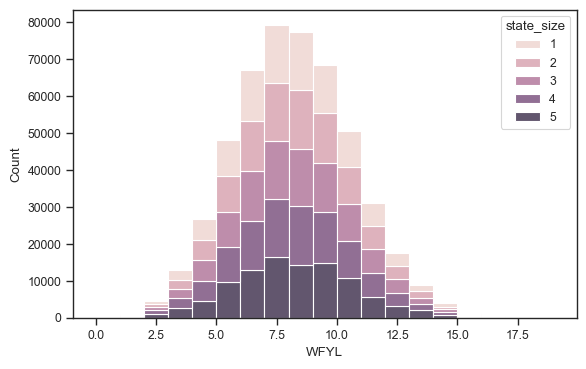

In [41]:
sns.histplot(data = synthetics_ss, x= "WFYL", hue = "state_size", multiple="stack", binwidth=1)

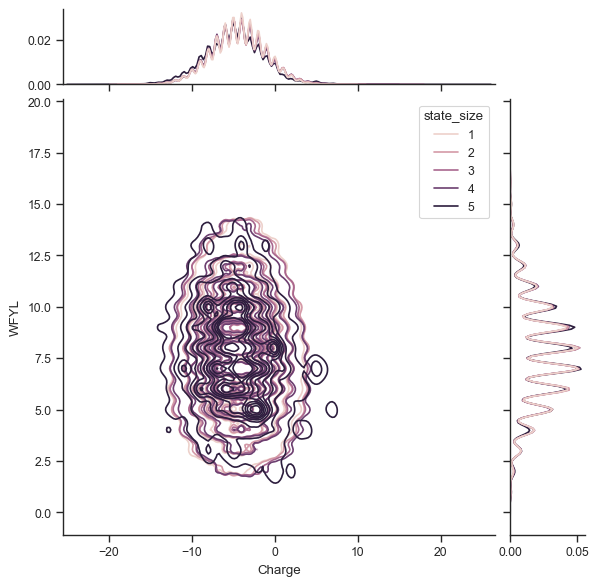

In [32]:
sns.set_context('paper')

# Create a joint plot with marginal histograms
joint_plot = sns.jointplot(
    data=synthetics_ss,
    x="Charge",
    y="WFYL",
    kind="kde",
    hue = 'state_size',
    marginal_ticks=True)#,
    #palette = {"Proteome" : "Purple", "Synthetics" : "Orange", "GCN4" : "Green"}, height = 5)

# for artist in joint_plot.ax_joint.collections:
#     artist.remove()
# joint_plot.plot_marginals(sns.histplot, binwidth = 1)

# sns.kdeplot(data = tiled_proteome[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Tiled Proteome', cmap='Purples', ax = joint_plot.ax_joint)
# sns.kdeplot(data = synthetic_seqs[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='Synthetic Sequences', cmap='Oranges', ax = joint_plot.ax_joint)
# sns.kdeplot(data = gcn4[["Charge", "WFYL"]], x= "Charge", y = "WFYL", label='GCN4', cmap='Greens', ax = joint_plot.ax_joint)


# # Add legend
# #joint_plot.ax_joint.legend(loc="upper left")
# joint_plot.fig.set_figwidth(6)
# joint_plot.fig.set_figheight(4)
# joint_plot.savefig("../output/proteome_heatmap_with_marginals_gcn4.png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()

So different state sizes have similar composition, as expected!